In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_utils import load_data

X_train, y_train = load_data('dataset/train.csv')
X_test, y_test = load_data('dataset/test.csv')

X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)

/Users/ayush/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


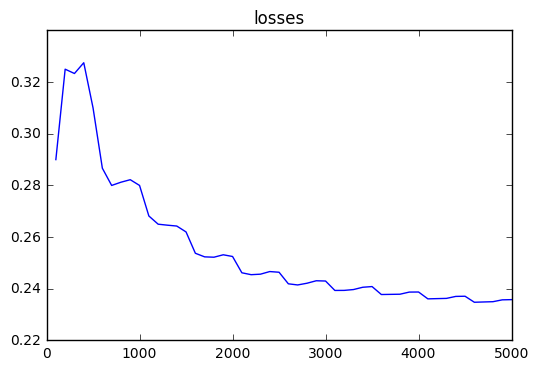

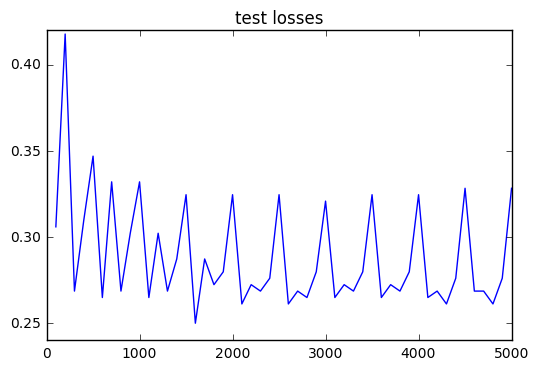

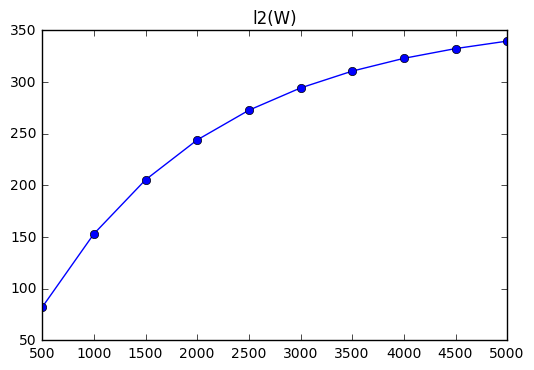

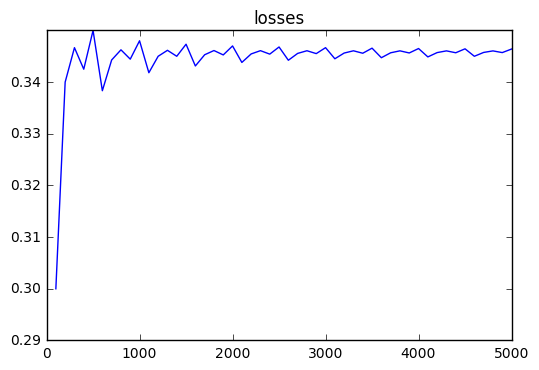

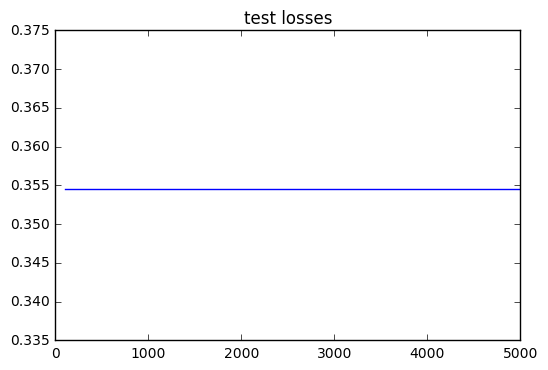

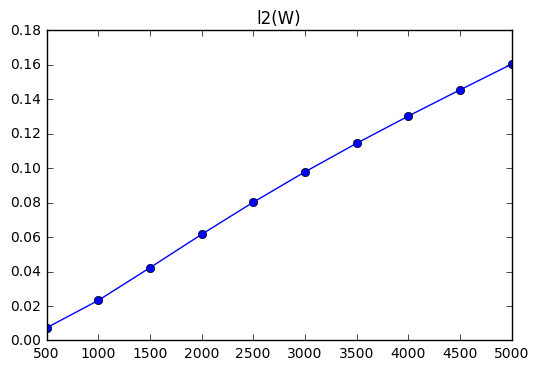

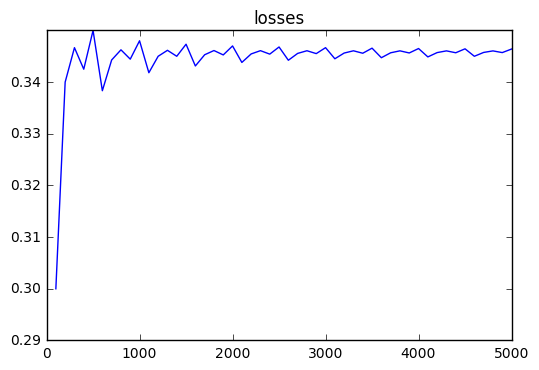

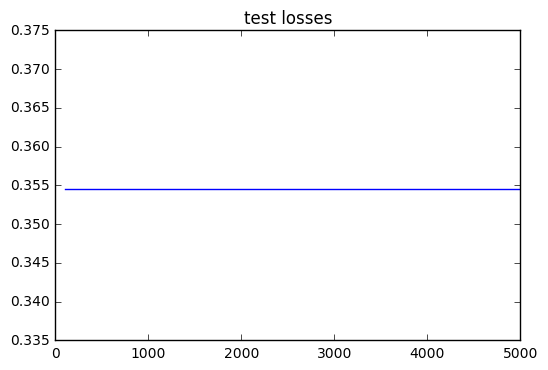

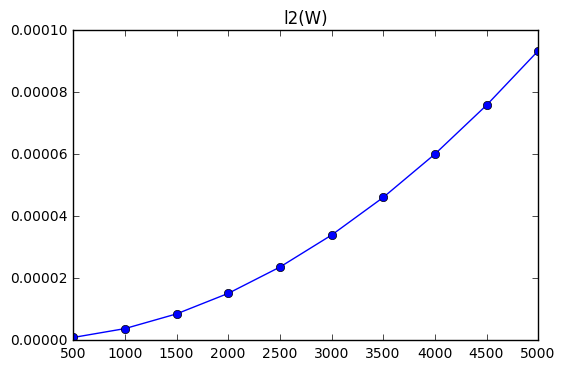

In [2]:
from logistic import logistic_loss
N = X_train.shape[0]

for netta in [0.8, 1e-3, 1e-5]:
    w = np.zeros(X_train.shape[1])
    losses = []
    test_losses = []
    l2s = []
    total_loss = 0
    for i in range(N * 10):
        loss, dw = logistic_loss(X_train[i % N, :].reshape(1, -1), y_train[i % N].reshape(1,), w)
        w -= netta * dw
        total_loss += loss
        if (i + 1) % 100 == 0:
            losses.append(1.0 * total_loss / (i + 1))
            test_loss, _ = logistic_loss(X_test, y_test, w)
            test_losses.append(test_loss)
        if (i + 1) % N == 0:
            l2s.append(np.sum(w ** 2))

    plt.plot((np.arange(len(losses)) + 1) * 100, losses)
    plt.title('losses')
    plt.show()
    
    plt.plot((np.arange(len(test_losses)) + 1) * 100, test_losses)
    plt.title('test losses')
    plt.show()
    
    plt.plot((np.arange(len(l2s)) + 1) * N, l2s, marker='o')
    plt.title('l2(W)')
    plt.show()
    
#       accuracy = 1.0 * np.sum(y_pred == y_test) / y_test.shape[0]
#     print 'accuracy for netta=' + str(netta) + ': ' + str(round(accuracy * 100, 2)) + '%'

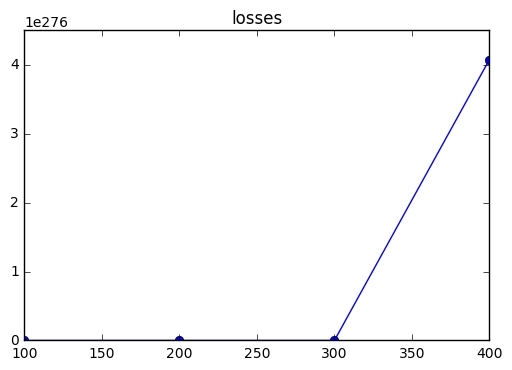

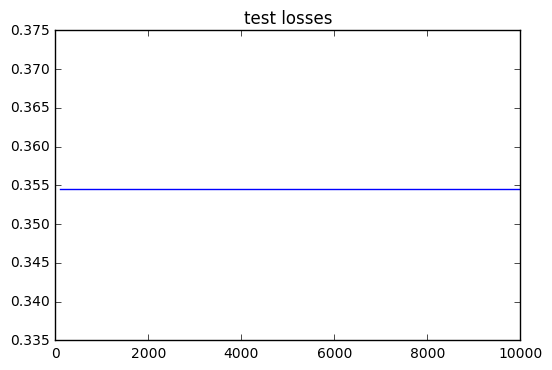

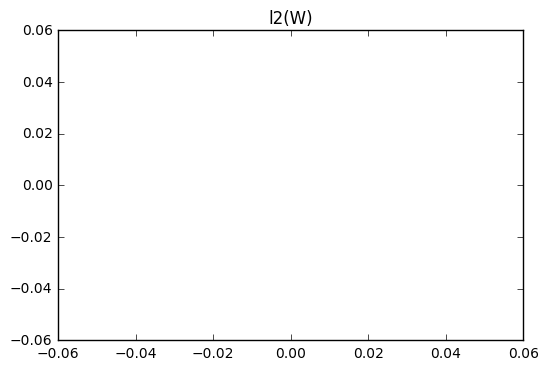

accuracy for netta=0.8: 64.55%


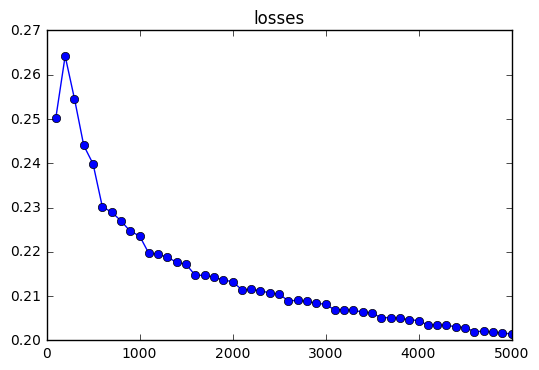

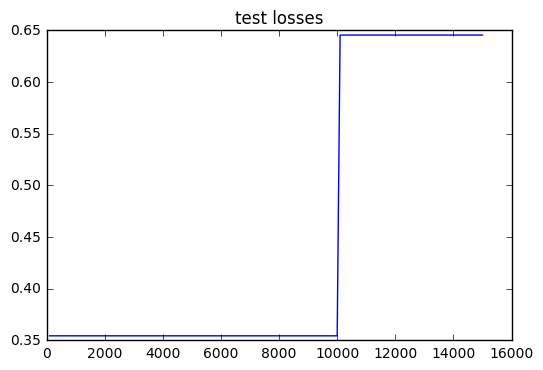

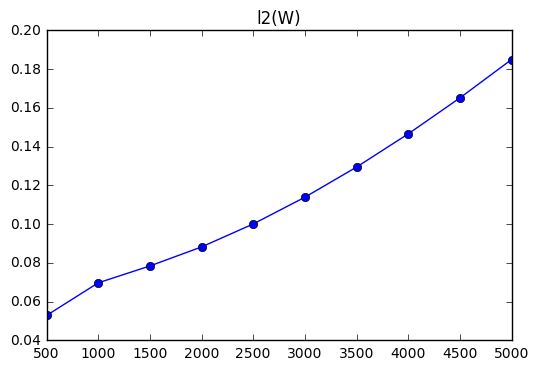

accuracy for netta=0.001: 50.75%


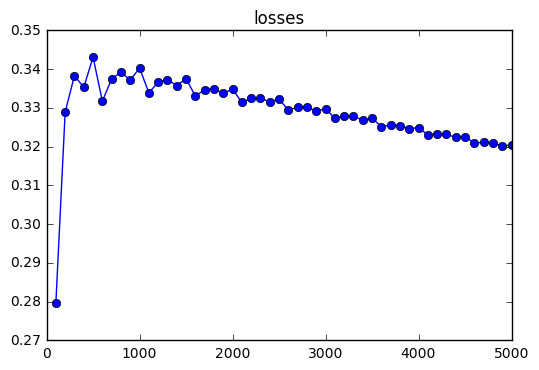

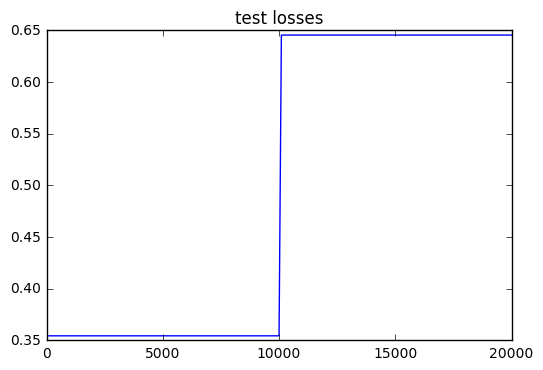

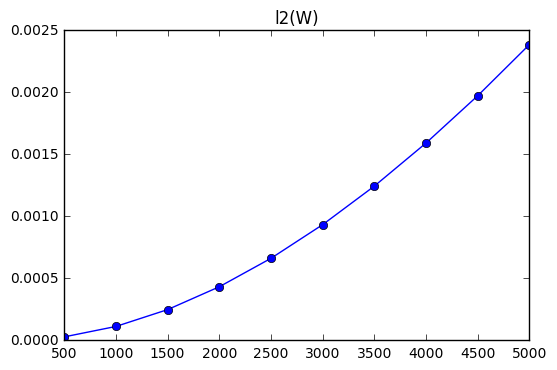

accuracy for netta=1e-05: 35.45%


In [3]:
from linear import linear_loss
N = X_train.shape[0]

for netta in [0.8, 1e-3, 1e-5]:
    w = np.zeros(X_train.shape[1])
    losses = []
    test_losses
    l2s = []
    total_loss = 0
    for i in range(N * 10):
        loss, dw = linear_loss(X_train[i % N, :].reshape(1, -1), y_train[i % N].reshape(1,), w)
        w -= netta * dw
        total_loss += loss
        if (i + 1) % 100 == 0:
            losses.append(1.0 * total_loss / (i + 1))
            test_loss, _ = logistic_loss(X_test, y_test, w)
            test_losses.append(test_loss)
        if (i + 1) % N == 0:
            l2s.append(np.sum(w ** 2))
    
    plt.plot((np.arange(len(losses)) + 1) * 100, losses, marker='o')
    plt.title('losses')
    plt.show()
    
    plt.plot((np.arange(len(test_losses)) + 1) * 100, test_losses)
    plt.title('test losses')
    plt.show()
    
    plt.plot((np.arange(len(l2s)) + 1) * N, l2s, marker='o')
    plt.title('l2(W)')
    plt.show()
    
    y_pred = linear_loss(X_test, None, w)
    pivot = (np.max(y_pred) - np.min(y_pred)) / 2.0
    y_pred = (y_pred > pivot) * 1
    
    accuracy = 1.0 * np.sum(y_pred == y_test) / y_test.shape[0]
    print 'accuracy for netta=' + str(netta) + ': ' + str(round(accuracy * 100, 2)) + '%'